In [21]:
from numpy import zeros, ones, hstack
from numpy.random import rand, randn
from keras.models import Sequential
from keras.layers import Dense

In [9]:
# define standalone discriminator model

def define_discriminator_model(n_inputs=2):
    model = Sequential()
    model.add(Dense(25,
                    activation='relu',
                    kernel_initializer = 'he_uniform',
                    input_dim = n_inputs))
    
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])
    
    return model

In [4]:
# generate n real samples with class labels

def generate_real_samples(n):
    # generate inputs in [-0.5, 0.5]
    X1 = rand(n) - 0.5
    # generate outputs X^2
    X2 = X1 * X1
    
    X1 = X1.reshape(n, 1)
    X2 = X2.reshape(n, 1)
    
    # stack array
    X = hstack((X1, X2))
    
    # generate class labels
    y = ones((n, 1))
    
    return X, y

In [5]:
# generate n fake samples with class labels

def generate_fake_samples(n):
    # generate inputs in [-1, 1]
    X1 = -1 + rand(n) * 2
    # generate outputs [-1, 1]
    X2 = -1 + rand(n) * 2
    
    X1 = X1.reshape(n, 1)
    X2 = X2.reshape(n, 1)
    
    # stack array
    X = hstack((X1, X2))
    
    # generate class labels
    y = zeros((n, 1))
    
    return X, y

In [7]:
def train_discriminator(model, n_epochs=1000, n_batch=128):
    half_batch = int(n_batch/2)
    
    for i in range(n_epochs):
        # generate  real samples
        X_real, y_real = generate_real_samples(half_batch)
        
        # update model
        model.train_on_batch(X_real, y_real)
        
        # generate  fake samples
        X_fake, y_fake = generate_fake_samples(half_batch)
        
        # update model
        model.train_on_batch(X_fake, y_fake)
        
        # evaluate the model
        _, acc_real = model.evaluate(X_real, y_real, verbose=0)
        _, acc_fake = model.evaluate(X_fake, y_fake, verbose=0)
        
        print(i, acc_real, acc_fake)

In [10]:
# define discriminator model
model = define_discriminator_model()

# fit the model
train_discriminator(model)

0 0.015625 0.609375
1 0.0 0.5625
2 0.015625 0.609375
3 0.046875 0.515625
4 0.0 0.609375
5 0.015625 0.65625
6 0.0 0.609375
7 0.03125 0.59375
8 0.015625 0.6875
9 0.046875 0.578125
10 0.046875 0.609375
11 0.0 0.59375
12 0.0625 0.59375
13 0.078125 0.671875
14 0.046875 0.640625
15 0.046875 0.65625
16 0.015625 0.5625
17 0.046875 0.6875
18 0.0625 0.65625
19 0.015625 0.53125
20 0.0625 0.734375
21 0.0625 0.65625
22 0.03125 0.703125
23 0.109375 0.640625
24 0.078125 0.546875
25 0.078125 0.640625
26 0.09375 0.78125
27 0.078125 0.640625
28 0.0625 0.765625
29 0.078125 0.734375
30 0.078125 0.6875
31 0.03125 0.65625
32 0.046875 0.734375
33 0.09375 0.671875
34 0.0625 0.671875
35 0.09375 0.640625
36 0.046875 0.65625
37 0.125 0.65625
38 0.125 0.75
39 0.109375 0.6875
40 0.15625 0.578125
41 0.09375 0.703125
42 0.125 0.640625
43 0.0625 0.65625
44 0.109375 0.609375
45 0.109375 0.640625
46 0.09375 0.609375
47 0.109375 0.65625
48 0.15625 0.734375
49 0.109375 0.6875
50 0.125 0.703125
51 0.09375 0.828125
52 0.10

422 0.859375 0.90625
423 0.9375 0.953125
424 0.9375 0.890625
425 0.921875 0.90625
426 0.953125 0.90625
427 0.9375 0.96875
428 0.96875 0.90625
429 0.921875 0.953125
430 0.953125 0.890625
431 0.96875 0.90625
432 0.9375 0.859375
433 0.953125 0.9375
434 0.9375 0.96875
435 0.953125 0.859375
436 0.9375 0.9375
437 0.984375 0.953125
438 0.953125 0.9375
439 0.984375 0.96875
440 1.0 0.859375
441 0.953125 0.890625
442 0.9375 0.9375
443 0.984375 0.859375
444 1.0 0.90625
445 0.96875 0.96875
446 0.984375 0.875
447 0.953125 0.875
448 0.953125 0.828125
449 0.9375 0.875
450 0.984375 0.859375
451 0.9375 0.90625
452 0.984375 0.890625
453 0.984375 0.90625
454 1.0 0.921875
455 1.0 0.9375
456 0.984375 0.9375
457 1.0 0.953125
458 0.96875 0.828125
459 0.953125 0.890625
460 0.96875 0.90625
461 0.984375 0.9375
462 1.0 0.921875
463 1.0 0.984375
464 0.9375 0.921875
465 1.0 0.859375
466 0.96875 0.8125
467 0.984375 0.859375
468 1.0 0.890625
469 1.0 0.859375
470 1.0 0.875
471 0.984375 0.828125
472 0.984375 0.9375
47

907 1.0 0.890625
908 1.0 0.9375
909 1.0 0.84375
910 1.0 0.890625
911 1.0 0.921875
912 1.0 0.890625
913 1.0 0.828125
914 1.0 0.890625
915 1.0 0.90625
916 1.0 0.90625
917 1.0 0.921875
918 1.0 0.84375
919 1.0 0.765625
920 1.0 0.828125
921 1.0 0.859375
922 1.0 0.859375
923 1.0 0.9375
924 1.0 0.828125
925 1.0 0.859375
926 1.0 0.875
927 1.0 0.796875
928 1.0 0.875
929 1.0 0.90625
930 1.0 0.90625
931 1.0 0.796875
932 1.0 0.90625
933 1.0 0.90625
934 1.0 0.765625
935 1.0 0.890625
936 1.0 0.921875
937 1.0 0.859375
938 1.0 0.890625
939 1.0 0.921875
940 1.0 0.8125
941 1.0 0.90625
942 1.0 0.78125
943 1.0 0.90625
944 1.0 0.75
945 1.0 0.859375
946 1.0 0.890625
947 1.0 0.828125
948 1.0 0.9375
949 1.0 0.890625
950 1.0 0.78125
951 1.0 0.875
952 1.0 0.859375
953 1.0 0.796875
954 1.0 0.875
955 1.0 0.890625
956 1.0 0.796875
957 1.0 0.828125
958 1.0 0.875
959 1.0 0.90625
960 1.0 0.875
961 1.0 0.765625
962 1.0 0.875
963 1.0 0.84375
964 1.0 0.875
965 1.0 0.875
966 1.0 0.921875
967 1.0 0.796875
968 1.0 0.890625

In [15]:
# define generator model

def define_generator(latent_dim, n_outputs=2):
    generator_model = Sequential(name = 'Generator_Model')
    generator_model.add(Dense(15, 
                              activation='relu',
                              kernel_initializer = 'he_uniform',
                              input_dim = latent_dim))
    
    generator_model.add(Dense(n_outputs, activation='linear'))
    
    return generator_model

In [16]:
generator_model = define_generator(5)

generator_model.summary()

Model: "Generator_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 15)                90        
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 32        
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


In [30]:
demo = randn(5*2)
demo = demo.reshape((2, 5))
#print(demo)

y = generator_model.predict(demo)

print(y)

[[0.42637646 0.59807366]
 [0.3136908  0.49216425]]


In [32]:
from matplotlib import pyplot

In [31]:
# generate points in latent space as input for the generator

def generate_latent_points(latent_dim, n):
    x_input = randn(latent_dim * n)
    x_input = x_input.reshape((n, latent_dim))
    
    return x_input

In [33]:
# use the generator to generate n fake examples and plot the result

def generate_fake_samples(generator, latent_dim, n):
    
    x_input = generate_latent_points(latent_dim, n)
    
    X = generator.predict(x_input)
    
    # plot the result
    pyplot.scatter(X[:, 0], X[:, 1])
    pyplot.show()

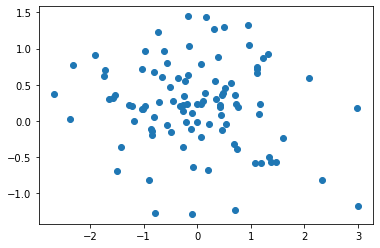

In [35]:
latent_dim = 5
n = 100
generate_fake_samples(generator_model, latent_dim, n)